In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from preprocessing_data.utils import format_Dataframes, preprocessing_dataframe, remove_outliers, winsorize_dataframe

In [2]:
df = format_Dataframes(data_path="D:\-DSP391m-Forecasting-Financial-Time-Series-With-Transformer\craw_data\FPT_stock.xlsx", type_file="xlsx")
df.head(3)

,Tên,Ngày,Đóng cửa,Điều chỉnh,Thay đổi,Thay đổi 1,%,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
0,FPT,2024-05-21,136.0,--,3(2.26,3(2.26%),%),NaN,467.06,734.400,99.45,134.0,136.0,133.5
1,FPT,2024-05-20,133.0,--,-1.5(-1.12,-1.5(-1.12%),%),NaN,270.50,NaN,152.86,135.2,136.1,133.0
2,FPT,2024-05-17,134.5,--,-0.9(-0.66,-0.9(-0.66%),%),NaN,310.27,642.601,86.43,135.4,136.0,133.7


In [3]:
df.tail(3)

,Tên,Ngày,Đóng cửa,Điều chỉnh,Thay đổi,Thay đổi 1,%,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
4340,FPT,2006-12-15,441.0,2024-07-14 00:00:00,21(5.00,21(5.00%),%),265.30,0.12,30.0,0.01,441.0,441.0,441.0
4341,FPT,2006-12-14,420.0,14,20(5.00,20(5.00%),%),280.71,0.12,96.0,0.04,420.0,420.0,420.0
4342,FPT,2006-12-13,400.0,13.34,0(0.00,0(0.00%),%),83.53,0.03,0.0,0.00,400.0,400.0,400.0


In [4]:
df = preprocessing_dataframe(df)
df

d:\-DSP391m-Forecasting-Financial-Time-Series-With-Transformer\preprocessing_data\utils.py:74: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataFrame = dataFrame.fillna(method='bfill')


,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
Ngày,,,,
2006-12-13,3.767628,3.764015,3.723418,3.810089
2006-12-14,4.003971,4.000148,3.957606,4.048511
2006-12-15,4.252131,4.248088,4.203502,4.298855
2006-12-18,4.512109,4.507834,4.461109,4.561119
2006-12-19,4.783903,4.779387,4.730424,4.835305
...,...,...,...,...
2024-05-15,0.625447,0.593930,0.614580,0.606882
2024-05-16,0.640809,0.642337,0.647366,0.641453
2024-05-17,0.630174,0.639976,0.632144,0.635493


In [5]:
def plot_price_changes(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    sns.lineplot(x='Ngày', y='Đóng cửa', data=df, label='Giá đóng cửa')
    sns.lineplot(x='Ngày', y='Mở cửa', data=df, label='Giá mở cửa')
    plt.title('Sự thay đổi của giá đóng và giá mở theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

In [7]:
def plot_price_range(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    df['Chênh lệch giá'] = df['Cao nhất'] - df['Thấp nhất']
    sns.lineplot(x='Ngày', y='Chênh lệch giá', data=df)
    plt.title('Sự chênh lệch giữa giá cao nhất và thấp nhất theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Chênh lệch giá')
    plt.xticks(rotation=45) 
    plt.tight_layout() 
    plt.show()


In [8]:
def plot_stock_data_boxplot(df):
    required_columns = [
        'Đóng cửa', 'Khối lượng (Khớp lệnh)', 'Giá trị (Khớp lệnh)', 
        'Khối lượng (Thỏa thuận)', 'Giá trị (Thỏa thuận)', 
        'Mở cửa', 'Cao nhất', 'Thấp nhất'
    ]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"DataFrame thiếu cột cần thiết: {col}")
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[required_columns])
    plt.title('Box Plot cho các cột giá cổ phiếu')
    plt.ylabel('Giá trị')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
def plot_correlation_heatmap(df: pd.DataFrame) -> None:
    numeric_cols = df.select_dtypes(include=['float64']).columns
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Biểu đồ heatmap của mối tương quan giữa các biến')
    plt.show()

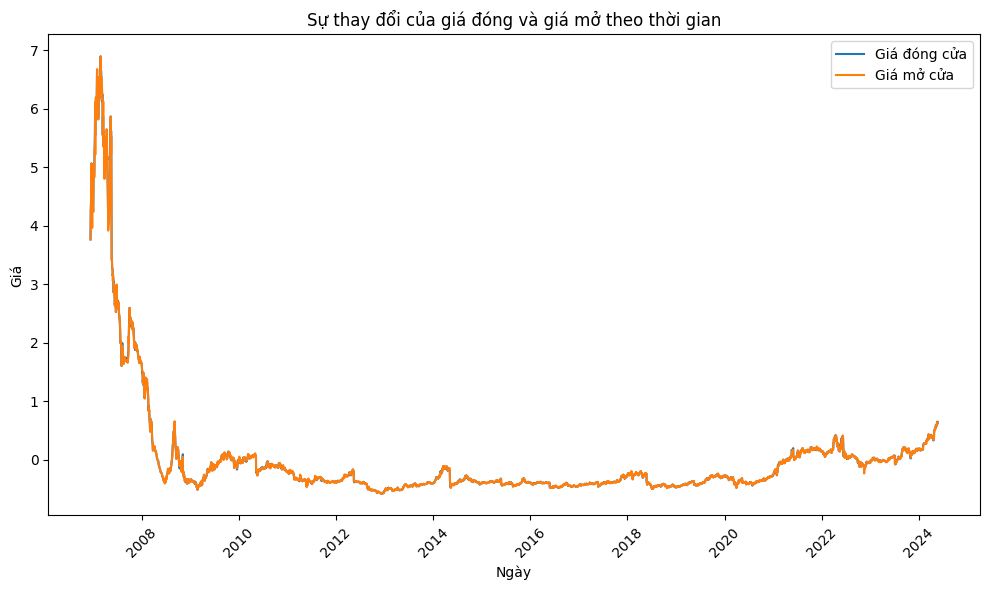

In [10]:
plot_price_changes(df)

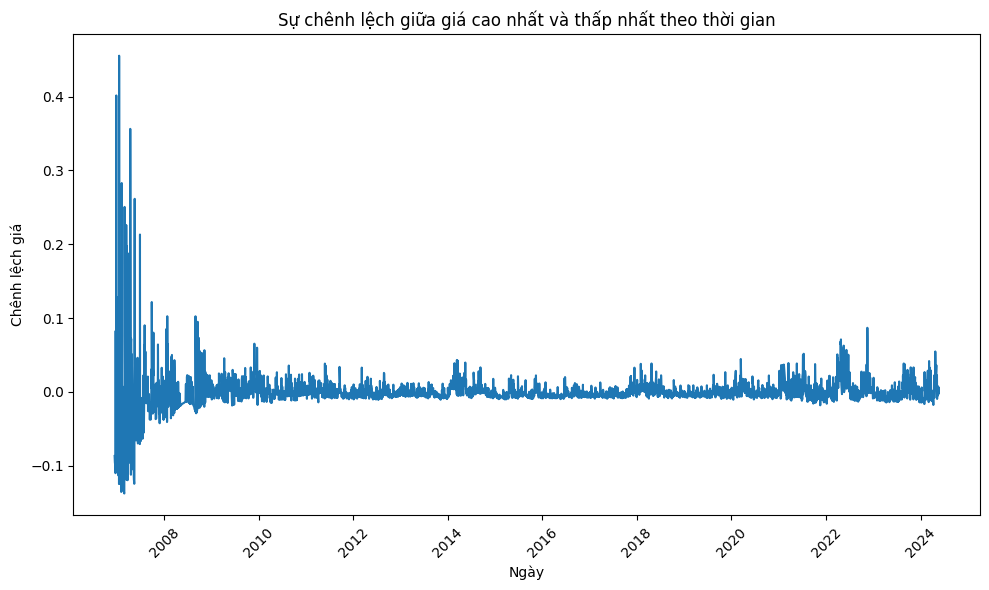

In [12]:
plot_price_range(df)

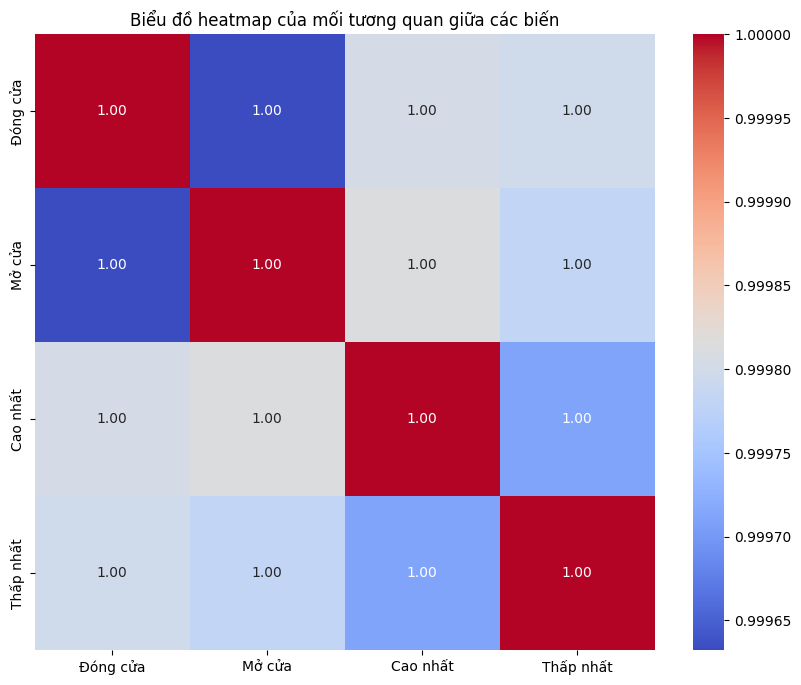

In [13]:
plot_correlation_heatmap(df)

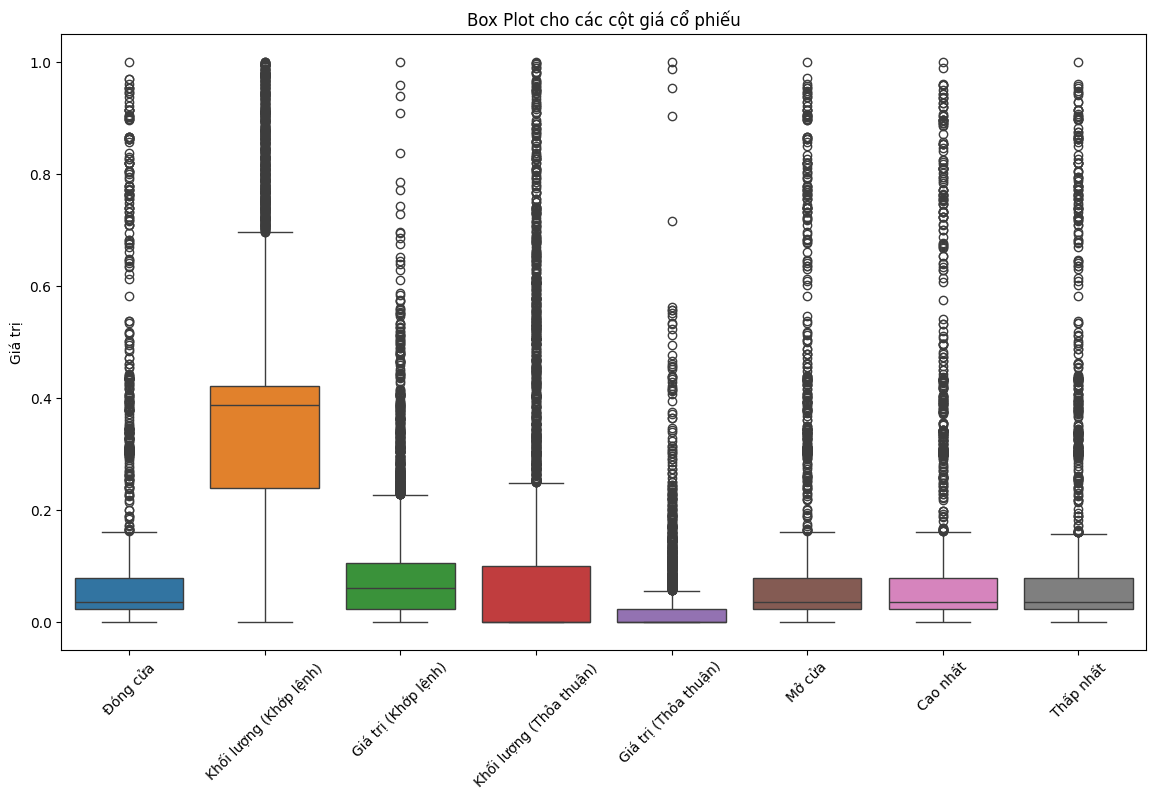

In [15]:
plot_stock_data_boxplot(df)

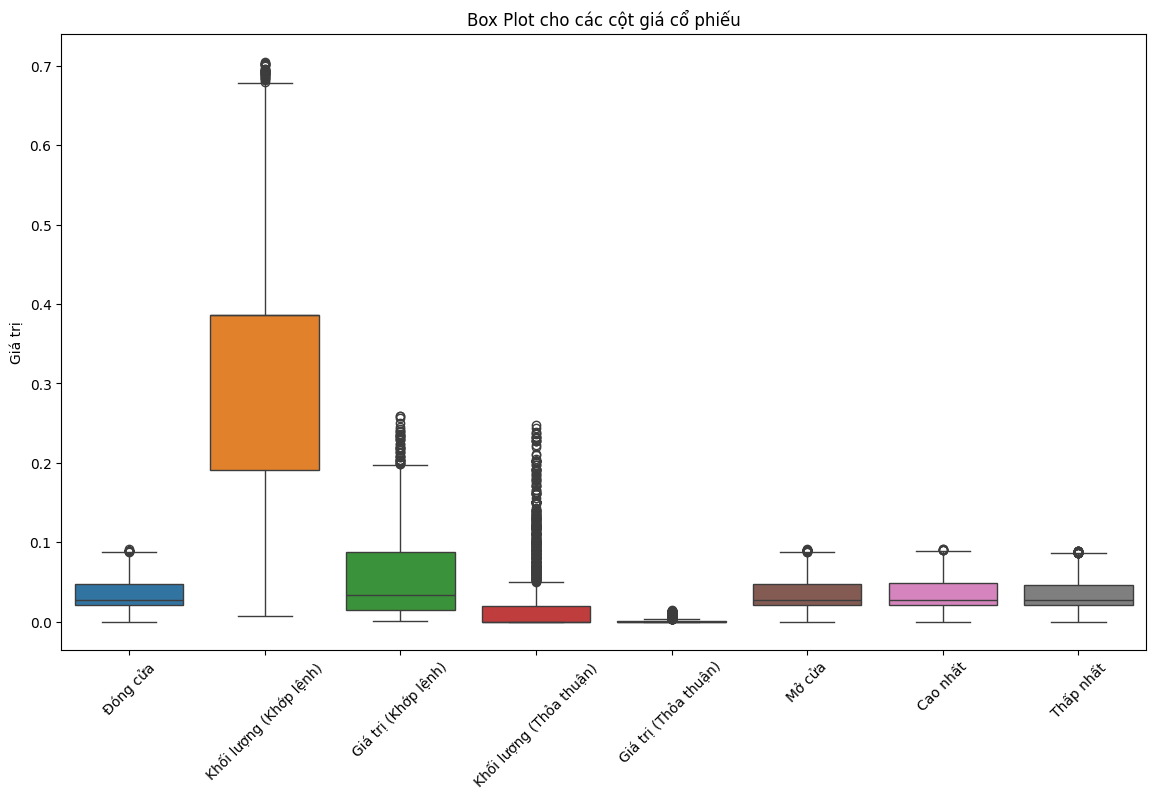

In [16]:
df1 = remove_outliers(df)
plot_stock_data_boxplot(df1)

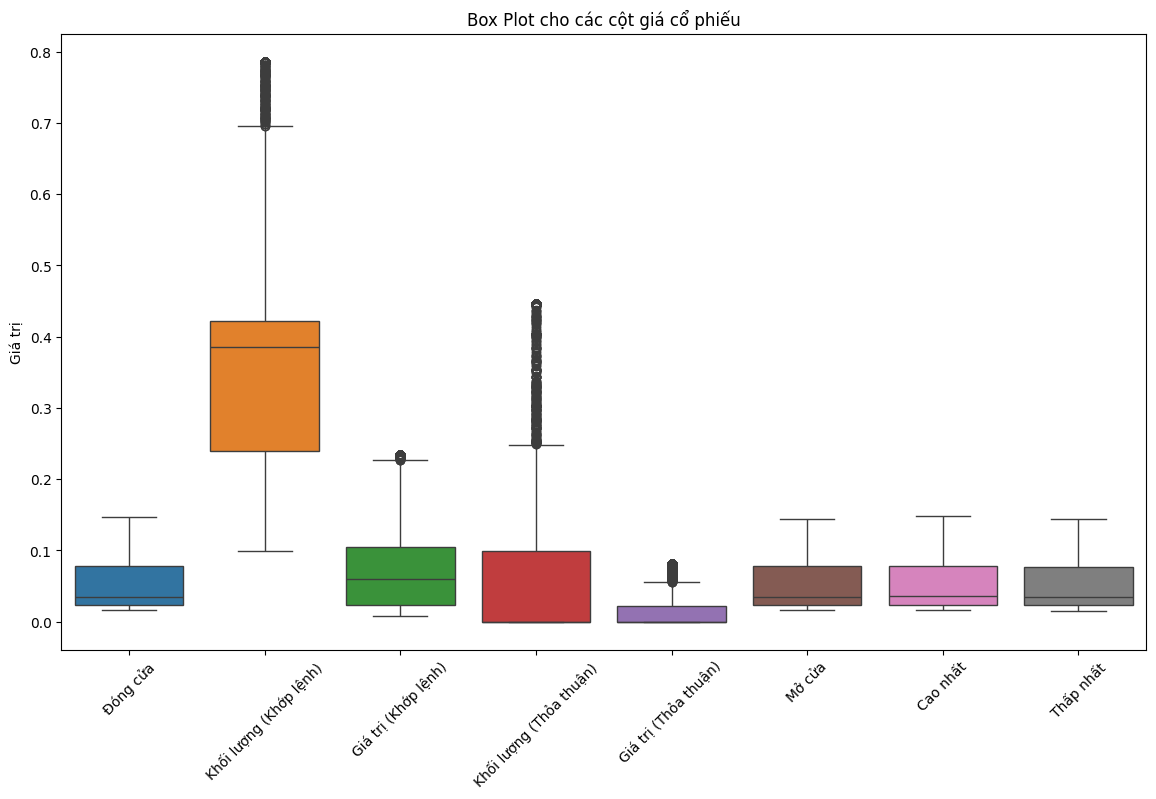

In [17]:
df2 = winsorize_dataframe(df)
plot_stock_data_boxplot(df2)